# Kriptovalute

Kriptovalute su digitalne imovine prvotno osmišljene kao sredstvo za razmjenu vrijednosti koje koriste kriptografiju za validaciju i sigurnost transakcija, te kontrolu stvaranja dodatnih jedinica.
Kriptovalute koriste decentraliziranu kontrolu za razliku od centraliziranih bankarskih sustava.

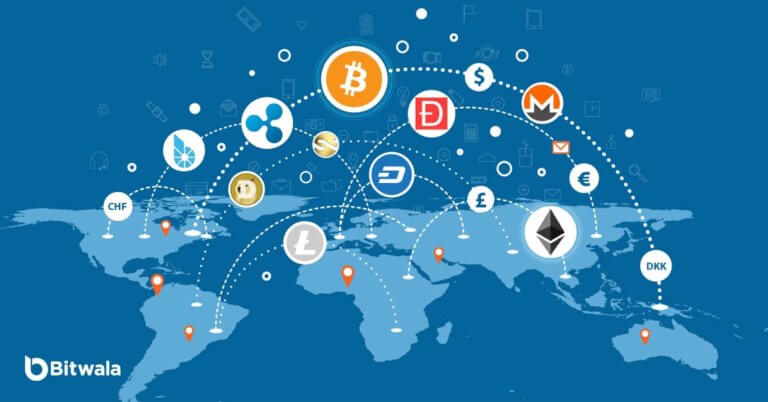

In [145]:
from IPython.display import Image 
Image(filename='Cryptocurrency.jpeg')

## Bitcoin

Bitcoin je prva decentralizirana kriptovaluta napravljena 2009. godine od čovjeka(ili ljudi) pod pseudonimom Satoshi Nakamoto. Motiv za projektiranje Bitcoina je bilo veliko nezadovoljstvo centraliziranim sustavom kojim su upravljale države i banke. 
Za Satoshija Nakamota problem bankarskog sustava je bilo povjerenje trećoj strani, tj. samoj banci preko kojih se svaka transakcija odvijala. Ono što je bilo potrebno je elektronički platni sustav baziran na kriptografijskom dokazu a ne na povjerenju trećoj strani, koji bi omogućavao dvjema stranama da razmjene sredstva direktno jedan s drugim bez povjeravanja trećoj strani. Problem je rješen takozvanom javnom knjigom u kojoj su zapisane sve transakcije javno, a sami računi i količina novca na njima je postala anonimna. Javnu knjigu sadrži svaki čvor koji sudjeluje u mreži. Javna knjiga je zapravo niz blokova u kojima su zapisane transakcije koje su obavljane na mreži.

Od tada do danas napravljeno je mnoštvo kriptovaluta koje se baziraju na raznim područjima primjene(od financija, preko osiguranja do nutricionizma).


## Blochchain

Velika većina kriptovaluta je napravljena na blockchain tehnologiji. Blockchain možemo poistovjetiti sa bazom podataka koja je podjeljena između svih čvorova koji sudjeluju u sustavu.
Osnovna građevna jedinica svakog blockshaina je blok.
Svaki blok se sastoji od svog zaglavlja i tijela. Zaglavlje sadrži hash prethodnog bloka i hash trenutnog bloka, dok tijelo sadrži podatake koji su spremljeni u bloku(data).

In [146]:
import hashlib

class Block:

    def __init__(self, previousHash, data):
        
        self.data = data
        self.previousHash = previousHash
        self.encoded = ""
        self.hash = self.hashBlock().hexdigest()
        
        
    def hashBlock(self):
        
        sha = hashlib.sha256()
        se = (str(self.data) + str(self.previousHash)).encode('utf-8')
        sha.update(se)
        return sha

In [147]:
firstBlock = Block("","Ovdje moze biti bilo koji podatak")
firstBlock.hash

'6e3f7192eb7e4267e58ebebedaa950654c45ac025e14dc596d5aa35d6d9b7929'

### Hash

Hash funkcija je algoritam koji od podatka proizvoljne dužine(može biti slovo, a može biti i tekst cijele Biblije) stvara podatak fiksne dužine. Hashiranje je deterministički određena funkcija gdje isti ulaz podataka uvijek daje istu izlaznu vrijednost. Najmanja izmjena podatka kojeg hashiramo rezultira totalno drugim outputom.
Linija iznad ispisuje jedinstveni 256-bitni output SHA-256 algoritma. Ako malo promjenimo ulazni string vijednost hash funkcije će biti totalno drugačija:

In [148]:
secondBlock = Block(firstBlock.hash,"Ovdje moze biti bilo koji podatak") #podaci su isti samo je previousHash drugaciji
secondBlock.hash

'cbef0b2cc7ecdd53ccafad1a84f7e837870192a1ba6ca7ae45bb2a8a5eee7ef8'

Što je toliko zanimljivo kod hash funkcije?

Odgovor leži u invertibilnosti hash funkcije. Što znači da je gotovo nemoguće rekonstruirati ulaznu vrijednost gledajući samo izlaznu vrijednost.
Također pomoću hash funkcije svaki blok ima svoju jedinstvenu "šifru" koja ovisi o šifri prethodnog bloka i podacima koji se nalaze u samom bloku.

Najjednostavnija moguća implementacija blockchaina je sljedeća:

In [149]:
class Blockchain:
    
    def __init__(self, genesisBlock):
        
        self.blocks = []
        self.blocks.append(genesisBlock)
    
    def addNewBlock(self, block):
        
        self.blocks.append(block)

In [150]:
blockchain = Blockchain(firstBlock)
blockchain.addNewBlock(secondBlock)
thirdBlock = Block(secondBlock.hash,"Dostojevski je bio sin liječnika, pripadnika nižeg plemstva kojeg su ubili vlastiti kmetovi zbog okrutnosti i ponižavanja, dok mu je majka umrla u djetinjstvu. Budući pisac pohađa i završava vojno-inženjerijsko obrazovanje u Petrogradu, no rano odlučuje da će se posvetiti književničkom pozivu. Među ranim utjecajima najvažniji je njemački dramatičar i pjesnik Friedrich Schiller, za Dostojevskog utjelovljenje idealizma i humanosti - upliv koji je kasnije žestoko ismijavao i karikirao, no, kojeg se nije oslobodio do kraja života. Prevodi Balzacovu Eugeniju Grandet i pod utjecajem Gogolja piše svoje prvo djelo, kratki epistolarni roman Bijedni ljudi (1846.), koji je prikazom trpnji i zanosa tzv. malih ljudi oduševio najznačajnijeg ruskog kritičara Visariona Bjelinskog i lansirala Dostojevskog u sferu eminentnih ruskih književnih krugova. Autor se kreće u društvu literata i dobrostojećih mecena i plemstva, ali izgleda da su njegova sramežljivost, počeci manifestacije živčanih poremećaja koji su kasnije dijagnosticirani kao epilepsija, kao i sklonost kršćanskom misticizmu doprinijeli da nije bio u potpunosti prihvaćen u liberalno-sekularnim krugovima. ")
blockchain.addNewBlock(thirdBlock)
print(blockchain.blocks[0].hash)
print(blockchain.blocks[1].hash)
print(blockchain.blocks[2].hash)

6e3f7192eb7e4267e58ebebedaa950654c45ac025e14dc596d5aa35d6d9b7929
cbef0b2cc7ecdd53ccafad1a84f7e837870192a1ba6ca7ae45bb2a8a5eee7ef8
af9e188651c8b43c87ba5576e54bc2dc2f49e8adfea45d1d8b33279392f61f58


U liniji iznad imamo blockchain koji se sastoji od tri bloka koji su povezani tako da treći blok sadrži u svom zaglavlju hash drugoga a drugi u zaglavlju hash prvoga. Ako promjenimo bilo što u podacima bilo kojega bloka njegov, a i svi hashovi blokova koji slijede bit će promjenjeni:

In [152]:
blockchain1 = Blockchain(firstBlock)
secondBlock = Block(firstBlock.hash,"Promjenio sam drugi blok") #podaci su isti samo je previousHash drugaciji
blockchain1.addNewBlock(secondBlock)
thirdBlock = Block(secondBlock.hash,"Dostojevski je bio sin liječnika, pripadnika nižeg plemstva kojeg su ubili vlastiti kmetovi zbog okrutnosti i ponižavanja, dok mu je majka umrla u djetinjstvu. Budući pisac pohađa i završava vojno-inženjerijsko obrazovanje u Petrogradu, no rano odlučuje da će se posvetiti književničkom pozivu. Među ranim utjecajima najvažniji je njemački dramatičar i pjesnik Friedrich Schiller, za Dostojevskog utjelovljenje idealizma i humanosti - upliv koji je kasnije žestoko ismijavao i karikirao, no, kojeg se nije oslobodio do kraja života. Prevodi Balzacovu Eugeniju Grandet i pod utjecajem Gogolja piše svoje prvo djelo, kratki epistolarni roman Bijedni ljudi (1846.), koji je prikazom trpnji i zanosa tzv. malih ljudi oduševio najznačajnijeg ruskog kritičara Visariona Bjelinskog i lansirala Dostojevskog u sferu eminentnih ruskih književnih krugova. Autor se kreće u društvu literata i dobrostojećih mecena i plemstva, ali izgleda da su njegova sramežljivost, počeci manifestacije živčanih poremećaja koji su kasnije dijagnosticirani kao epilepsija, kao i sklonost kršćanskom misticizmu doprinijeli da nije bio u potpunosti prihvaćen u liberalno-sekularnim krugovima. ")
blockchain1.addNewBlock(thirdBlock)
print(blockchain1.blocks[0].hash)
print(blockchain1.blocks[1].hash)
print(blockchain1.blocks[2].hash)

6e3f7192eb7e4267e58ebebedaa950654c45ac025e14dc596d5aa35d6d9b7929
b5a305ad60882dfa76b1a16b8bee56e6912b201f8b95776210547812db0dce79
e58da200b19e4e7f45a1f900c9989ca20fe473f1fb56b8f7dbb4c57a300ab5e7


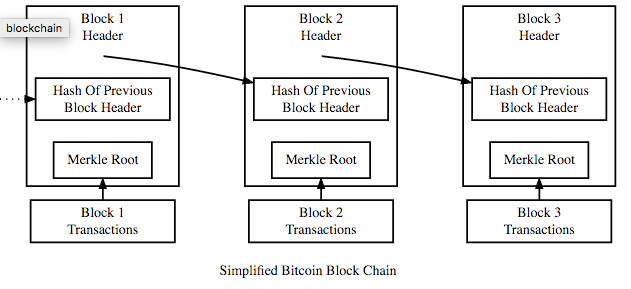

In [131]:
Image(filename='blockchain.png')

Da bi implementirali primitivnu kriptovalutu morat ćemo dodati još puno toga u svaki blok. Krenimo sa transakcijama. U svaki blok ćemo upisivati transakcije koje će biti javno dostupne svim čvorovima, tj. svatko tko sudjeluje u održavanju mreže vidi tko je kome poslao koju kolićinu coina. Čvorovi koji sudjeluju u održavanju mreže zovu se rudari(miners).
Za početak implementirat ćemo transakciju:

In [ ]:
class Transaction:
    
    def __init__(self, sender, reciever, amount,fee):
        
        self.sender = sender
        self.reciever = reciever
        self.amount = amount
        self.fee = fee
        self.encoded = (str(self.sender) + str(self.reciever) + 
                str(self.amount) ).encode('utf-8')
        self.hash = self.hashTransaction().hexdigest()
        
        
    def hashTransaction(self):
        
        sha = hashlib.sha256()
        sha.update(self.encoded)
        return sha
    
    def printTransaction(self):
        
        print(str(self.sender)+" "+ str(self.reciever)+" "+str(self.amount))

Kada korisnik mreže odluči poslati određenu količinu coina nekom drugom korisniku on ponudi određenu naknadu rudaru koji uvrsti njegovu transakciju u svoj blok. Normalno što je veća naknada ponuđena to je veća vjerojatnost da će njegova transakcija biti prihvaćena prije. Sve transakcije koje su predložene ali nisu prihvaćene idu u bazen nepotvrđenih transakcija(mempool):

In [ ]:
class Mempool:
    
    def __init__(self):
        
        self.transactions=[]
        
    def addNewTransaction(self,transaction):
        
        self.transactions.append(transaction)
        self.transactions = sorted(self.transactions, key=lambda trans: trans.fee)
    
    def printMempool(self):
        
        for trans in self.transactions:
            trans.printTransaction()

In [189]:
import rsa

class Wallet:
    
    def __init__(self,name):
        
        self.name = name
        self.privateKey =""
        self.publicKey =""
        self.listOfTransaction = []
        self.generateKeys()
        
        
    def generateKeys(self):
        
        (self.publicKey, self.__privateKey)=rsa.newkeys(512)

In [191]:
wallet1 = Wallet("Alice")
wallet2 = Wallet("Bob")
wallet1.publicKey
message="Kako si Alice".encode()
crypto = rsa.encrypt(message, wallet1.publicKey)
decMessage =rsa.decrypt(crypto, wallet1.privateKey)

AttributeError: 'str' object has no attribute 'n'

In [170]:
code = pow("ante", "65537", "5551201688147")               # encode using a public key
plaintext = pow(code, 109182490673, 5551201688147)  # decode using a private key

TypeError: unsupported operand type(s) for pow(): 'str', 'str', 'str'

In [105]:
import hashlib

class Block:

    def __init__(self, index, timpestamp, previousHash, transactions):
        
        self.index = index
        self.timestamp = timpestamp
        self.nounce = 0
        self.transactions = transactions
        self.previousHash = previousHash
        self.encoded = ""
        self.hash = ""
        self.dificulty = "0"*5+"F"*60
        self.mineIt()
        
    def hashBlock(self):
        
        sha = hashlib.sha256()
        self.encoded = (str(self.index) + str(self.timestamp) + str(self.nounce)+
                str(self.transactions) + str(self.previousHash)).encode('utf-8')
        sha.update(self.encoded)
        return sha
    
    def mineIt(self):
        
        while(not self.hashBlock().hexdigest()<self.dificulty):
            self.nounce +=1
        self.hash = self.hashBlock().hexdigest()

In [106]:
genesisBlock = Block(0, getMeTime(),"","")
genesisBlock.mineIt()
genesisBlock.hash

712531
712531


'000004f8507f84021f9f6323a7f1f81702ce11650ddbf5020e7665cd27c58a69'

In [85]:


def hashBlock(string):
        
    sha = hashlib.sha256()
    
    sha.update(string.encode())
    return sha


star="0"*3+"F"*63
hashBlock(star)
hashBlock(star).hexdigest()<star

False

In [54]:
class Transaction:
    
    def __init__(self, sender, reciever, amount,fee):
        
        self.sender = sender
        self.reciever = reciever
        self.amount = amount
        self.fee = fee
        self.encoded = (str(self.sender) + str(self.reciever) + 
                str(self.amount) ).encode('utf-8')
        self.hash = self.hashTransaction().hexdigest()
        
        
    def hashTransaction(self):
        
        sha = hashlib.sha256()
        sha.update(self.encoded)
        return sha
    
    def printTransaction(self):
        
        print(str(self.sender)+" "+ str(self.reciever)+" "+str(self.amount))

Mempool je lista svih nepotvrđenih transakcija, tj. transakcija koje nisu na blockchainu. Prioritet imaju transakcije sa većom naknadom(fee) i one su stavljenje zadnje u listu nepotvrđenih transakcija.

In [75]:
class Mempool:
    
    def __init__(self):
        
        self.transactions=[]
        
    def addNewTransaction(self,transaction):
        
        self.transactions.append(transaction)
        self.transactions=sorted(self.transactions, key=lambda trans: trans.fee)
    
    def printMempool(self):
        
        for trans in self.transactions:
            trans.printTransaction()

In [73]:
class Node:
    
    def __init__(self, name):
    
        self.name = name
        self.balance = 0
        self.priKey = self.hashNode(self.name.encode('utf-8')).hexdigest()
        self.priKey = self.hashNode().hexdigest()
        
    def hashNode(self, stringToHash):
        
        sha = hashlib.sha256()
        sha.update(stringToHash)
        return sha

In [87]:
trans1 = Transaction("Alice","Bob",10,0.001)
trans2 = Transaction("Bob","Peter",3, 0.002)
trans3 = Transaction("Alice","Mary",2,0.005)
trans4 = Transaction("Peter","Mary",2,0.003)
mempool = Mempool()
mempool.addNewTransaction(trans1)
mempool.addNewTransaction(trans2)
mempool.addNewTransaction(trans3)
mempool.addNewTransaction(trans4)
mempool.transactions[2].sender
mempool.printMempool()

Alice Bob 10
Bob Peter 3
Peter Mary 2
Alice Mary 2


In [52]:
import datetime as date

def getMeTime():
    
    return date.datetime.now()

In [76]:
genesisBlock = Block(0, getMeTime(),"",["First block"])
genesisBlock.hashMe()
genesisBlock.hash

AttributeError: 'Block' object has no attribute 'hashMyBlock'

Vidimo da za isti ulaz funkcija sha256 daje isti izlaz:

In [8]:
copyOfGenesisBlock = Block(genesisBlock.index,genesisBlock.timestamp,
                           genesisBlock.previousHash,genesisBlock.transactions)
copyOfGenesisBlock.hash

''

In [ ]:
class Blockchain:
    
    def __init__(self, genesisBlock):
        
        self.genesisBlock = genesisBlock
        self.blocks = []
        self.blocks.append(genesisBlock)
    
    def addNewBlock(self, block):
        
        self.blocks.append(block)

In [86]:
transactions = ["Alice Bob 50","Bob John 10"]

secondBlock = Block(1,getMeTime(),genesisBlock.hash,transactions)

transactions3 = ["Bob Alice 20", "John Mary 5", "Alice Mary 20"]
thirdBlock = Block(2,getMeTime(),secondBlock.hash,transactions3)

NameError: name 'genesisBlock' is not defined

In [ ]:
genesisBlock.transactions

In [ ]:
def printBlock(block):
    
    print("=" * 30 + " " + str(block.index) + " " + "=" * 30)
    print(block.hash)
    print("=" * 63)
    for trans in block.transactions:
        print(trans)

def printBlockchain(blockchain):
    
    for block in blockchain.blocks:
        printBlock(block)

In [ ]:
printBlock(genesisBlock)

In [ ]:
printBlock(secondBlock)

In [ ]:
blockchain = Blockchain(genesisBlock)
blockchain.addNewBlock(secondBlock)
blockchain.addNewBlock(thirdBlock)
printBlockchain(blockchain)

In [ ]:
import csv
lista = []
with open('data/bitcoin_price.csv') as file:
    read = csv.DictReader(file)
    for row in read:
        for feature in row:
            lista.append(row)
            print (row)

In [1]:
import pandas as pd
test = pd.read_csv('data/bitcoin_price.csv')

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
test

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 20, 2018",11231.80,11958.50,11231.80,11403.70,"9,926,540,000","189,536,000,000"
1,"Feb 19, 2018",10552.60,11273.80,10513.20,11225.30,"7,652,090,000","178,055,000,000"
2,"Feb 18, 2018",11123.40,11349.80,10326.00,10551.80,"8,744,010,000","187,663,000,000"
3,"Feb 17, 2018",10207.50,11139.50,10149.40,11112.70,"8,660,880,000","172,191,000,000"
4,"Feb 16, 2018",10135.70,10324.10,9824.82,10233.90,"7,296,160,000","170,960,000,000"
5,"Feb 15, 2018",9488.32,10234.80,9395.58,10166.40,"9,062,540,000","160,025,000,000"
6,"Feb 14, 2018",8599.92,9518.54,8599.92,9494.63,"7,909,820,000","145,023,000,000"
7,"Feb 13, 2018",8926.72,8958.47,8455.41,8598.31,"5,696,720,000","150,516,000,000"
8,"Feb 12, 2018",8141.43,8985.92,8141.43,8926.57,"6,256,440,000","137,258,000,000"
9,"Feb 11, 2018",8616.13,8616.13,7931.10,8129.97,"6,122,190,000","145,245,000,000"


In [4]:
import numpy
t=numpy.array(test.Date.values)


In [ ]:
df = pd.test(data=)

In [5]:
t=list(test.Date.values)
t

['Feb 20, 2018',
 'Feb 19, 2018',
 'Feb 18, 2018',
 'Feb 17, 2018',
 'Feb 16, 2018',
 'Feb 15, 2018',
 'Feb 14, 2018',
 'Feb 13, 2018',
 'Feb 12, 2018',
 'Feb 11, 2018',
 'Feb 10, 2018',
 'Feb 09, 2018',
 'Feb 08, 2018',
 'Feb 07, 2018',
 'Feb 06, 2018',
 'Feb 05, 2018',
 'Feb 04, 2018',
 'Feb 03, 2018',
 'Feb 02, 2018',
 'Feb 01, 2018',
 'Jan 31, 2018',
 'Jan 30, 2018',
 'Jan 29, 2018',
 'Jan 28, 2018',
 'Jan 27, 2018',
 'Jan 26, 2018',
 'Jan 25, 2018',
 'Jan 24, 2018',
 'Jan 23, 2018',
 'Jan 22, 2018',
 'Jan 21, 2018',
 'Jan 20, 2018',
 'Jan 19, 2018',
 'Jan 18, 2018',
 'Jan 17, 2018',
 'Jan 16, 2018',
 'Jan 15, 2018',
 'Jan 14, 2018',
 'Jan 13, 2018',
 'Jan 12, 2018',
 'Jan 11, 2018',
 'Jan 10, 2018',
 'Jan 09, 2018',
 'Jan 08, 2018',
 'Jan 07, 2018',
 'Jan 06, 2018',
 'Jan 05, 2018',
 'Jan 04, 2018',
 'Jan 03, 2018',
 'Jan 02, 2018',
 'Jan 01, 2018',
 'Dec 31, 2017',
 'Dec 30, 2017',
 'Dec 29, 2017',
 'Dec 28, 2017',
 'Dec 27, 2017',
 'Dec 26, 2017',
 'Dec 25, 2017',
 'Dec 24, 2017

In [6]:
import matplotlib.dates as dates
datesNew = dates.date2num(t)

AttributeError: 'numpy.str_' object has no attribute 'toordinal'

In [ ]:
dates.date2num?

In [ ]:
import numpy as np

In [ ]:
numpy.datetime64?

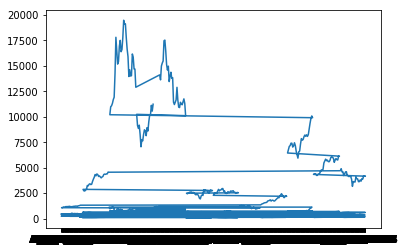

In [8]:
plt.plot(test.Date.values,test.Open.values)

In [ ]:
test.dtypes

In [ ]:
test.Date

In [9]:
dates=[]
opens =[]
index=[]
n = len(test.Date)
for i in range(0,n):
    dates.append(test.Date[i])
    opens.append(test.Open[n-i-1])
    index.append(i)

In [10]:
import matplotlib
datees = matplotlib.dates.date2num(dates)
matplotlib.pyplot.plot_date(datees, opens)

AttributeError: 'numpy.str_' object has no attribute 'toordinal'

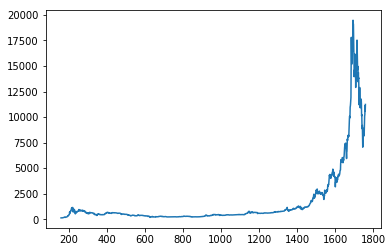

In [13]:
plt.plot(index[-1600:], opens[-1600:])